### MA4402 Simulación Estocástica: Teoría y Laboratorio
# Laboratorio 3: Algoritmos estocásticos usando cadenas de Markov
### Grupo 2<br>Integrantes: Leopoldo Cárdenas, Sigal Contreras, Andrés Toro, Miguel Videla

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## Problema 1: Modelo Ising en $\mathbb{Z}^2$

### Parte 1

El cardinal de $E$ resulta:

\begin{equation}
|E|=|E_{N-1}|+|E\setminus E_{N-1}|=2^{(2(N-1)+1)^2}+8N=2^{(2N-1)^2}+8N=2\cdot 2^{4N(N-1)}+8N=2\cdot \left(2^{4N(N-1)}+4N\right).
\end{equation}

Considerando el costo de cómputo $\mathcal{C}(Z(\beta))$ compuesto únicamente por la cantidad de elementos $[x(m)-x(m')]^2$ sumados, con $m\notin \partial \Lambda \vee m'\notin \partial \Lambda$ (ya que $\forall m,m' \in \partial \Lambda, [x(m)-x(m')]^2=[1-1]^2=0$), se obtiene que:

\begin{equation}
\mathcal{C}(Z(\beta))=|E|\cdot \mathcal{C}(H(y))=|E|\cdot (4N(2N+1)-8N)=|E|\cdot 4N(2N-1)=8N(2N-1)\cdot \left(2^{4N(N-1)}+4N\right),
\end{equation}

por lo que claramente, el término $Z(\beta)$ resulta incomputable en la práctica, incluso para $N$ pequeño. En particular para $N=10$:

\begin{equation}
\mathcal{C}(Z(\beta))=80(20-1)\cdot\left(2^{40(10-1)}+40\right)\approx 3.569785\cdot 10^{111}.
\end{equation}

### Parte 2

Considerando los elementos $x\sim y$, la matriz estocástica obtenida mediante el algoritmo de Gibbs resulta:

\begin{equation}
R_{xy}^{Gibbs}=\pi_y\cdot\left(\sum_{z\sim x} \pi_z\right)^{-1}=\frac{e^{-\beta H(y)}}{Z(\beta)}\cdot \left(\sum_{z\sim x} \frac{e^{-\beta H(z)}}{Z(\beta)}\right)^{-1}=\frac{e^{-\beta H(y)}}{Z^2(\beta)}\cdot \left(\sum_{z\sim x} e^{-\beta H(z)}\right)^{-1},
\end{equation}

mientras que la matriz estocástica obtenida mediante el algoritmo de Metropolis resulta:

\begin{equation}
R_{xy}^{Metropolis}=\frac{1}{\text{deg}(x)}=\frac{1}{|\{y:y\sim x\}|}=\frac{1}{(2(N-1)+1)^2}=\frac{1}{(2N-1)^2},
\end{equation}

donde $R_{xy}^{Gibbs}=R_{xy}^{Metropolis}=0$, si $x\not \sim y$.

De este modo, para el algoritmo de Gibbs se obtiene:

\begin{equation}
\frac{\pi_y R_{yx}^{Gibbs}}{\pi_x R_{xy}^{Gibbs}}=\frac{\frac{e^{-\beta H(y)} e^{-\beta H(x)}}{Z^3(\beta)}\cdot \left(\sum_{z'\sim y} e^{-\beta H(z')}\right)^{-1}}{\frac{e^{-\beta H(x)} e^{-\beta H(y)}}{Z^3(\beta)}\cdot \left(\sum_{z\sim x} e^{-\beta H(z)}\right)^{-1}}=\frac{\sum_{z\sim x} e^{-\beta H(z)}}{\sum_{z'\sim y} e^{-\beta H(z')}},
\end{equation}

mientras que para el algoritmo de Metropolis se obtiene:

\begin{equation}
\frac{\pi_y R_{yx}^{Metropolis}}{\pi_x R_{xy}^{Metropolis}}=\frac{\frac{e^{-\beta H(y)}}{Z(\beta)\cdot (2N-1)^2}}{\frac{e^{-\beta H(x)}}{Z(\beta)\cdot (2N-1)^2}}=\frac{e^{-\beta H(y)}}{e^{-\beta H(x)}}=e^{-\beta (H(y)-H(x))}.
\end{equation}

Analizando el costo computacional de cada algoritmo, de acuerdo al criterio enunciado en la sección anterior, se observa lo siguiente:

*  El término $R_{xy}^{Gibbs}$ resulta incomputable debido a la necesidad de calcular el término $Z^2(\beta)$ (además de muchos otros), mientras que $\mathcal{C}\left(R_{xy}^{Metropolis}\right)=1$, debido a que se compone de probabilidades de transición idénticas.
*  $\mathcal{C}\left(\frac{\pi_y R_{yx}^{Gibbs}}{\pi_x R_{xy}^{Gibbs}}\right)=2\cdot(2N-1)^2\cdot \mathcal{C}(H(y))=2\cdot(2N-1)^2\cdot4N(2N-1)$, mientras que $\mathcal{C}\left(\frac{\pi_y R_{yx}^{Metropolis}}{\pi_x R_{xy}^{Metropolis}}\right)=\mathcal{C}(H(y)-H(x))=2\cdot 4=8$, ya que como $x\sim y$, sólo basta computar las diferencias $[x(m)-x(m^*)]^2$ y $[x(m)-y(m^*)]^2=[x(m)+x(m^*)]^2$, en torno a la única molécula $m^*$ tal que $x(m^*)=-y(m^*)$ (las demás diferencias son idénticas en $x$ e $y$, y por lo tanto se cancelan). 

Se concluye que para el caso estudiado, el algoritmo de Metropolis resulta el de menor costo computacional, y por tanto, el más conveniente de utilizar.


### Parte 3

*  Pseudocódigo de algoritmo MCMC:
> $x\sim 2\cdot Be(p) -1 \texttt{;}$
<br>$\texttt{for (i=0; i<nf; i++) \{}$
<br>&emsp;$v\sim\mathcal{U}([0,1])\texttt{;}$
<br>&emsp;$y = f_R(v,x)\texttt{;}$
<br>&emsp;$u\sim\mathcal{U}([0,1])\texttt{;}$
<br>&emsp;$\texttt{if (}u \leq e^{-\beta(H(y)-H(x))}\texttt{) \{}$
<br>&emsp;&emsp;$x=y\texttt{;}$
<br>&emsp;$\texttt{\}}$
<br>$\texttt{\}}$

In [2]:
def Ising(N, beta, nf, p=2/3):
    R = np.ones((2*N-1)**2) / ((2*N-1)**2)
    Xn_1 = (2 * np.random.binomial(n=1, p=p, size=(2*N-1) ** 2) - 1).reshape((2*N-1, 2*N-1))
    X = np.pad(Xn_1.reshape((2*(N-1) + 1, 2*(N-1) + 1)), pad_width=1, mode='constant', constant_values=1)
    for _ in tqdm(range(nf)):
        idx = np.array(np.unravel_index((R.cumsum() >= np.random.uniform()).argmax(), shape=(2*N-1, 2*N-1))) + np.array([1,1])
        sum_X = (X[tuple(idx)] - X[tuple(idx + np.array([0,-1]))]) ** 2 + (X[tuple(idx)] - X[tuple(idx + np.array([-1,0]))]) ** 2 + \
            (X[tuple(idx)] - X[tuple(idx + np.array([0,1]))]) ** 2 + (X[tuple(idx)] - X[tuple(idx + np.array([1,0]))]) ** 2
        sum_Y = (-X[tuple(idx)] - X[tuple(idx + np.array([0,-1]))]) ** 2 + (-X[tuple(idx)] - X[tuple(idx + np.array([-1,0]))]) ** 2 + \
            (-X[tuple(idx)] - X[tuple(idx + np.array([0,1]))]) ** 2 + (-X[tuple(idx)] - X[tuple(idx + np.array([1,0]))]) ** 2
        delta_H = sum_Y - sum_X
        if np.random.uniform() <= np.exp(-beta * delta_H):
            X[tuple(idx)] *= -1
    return X

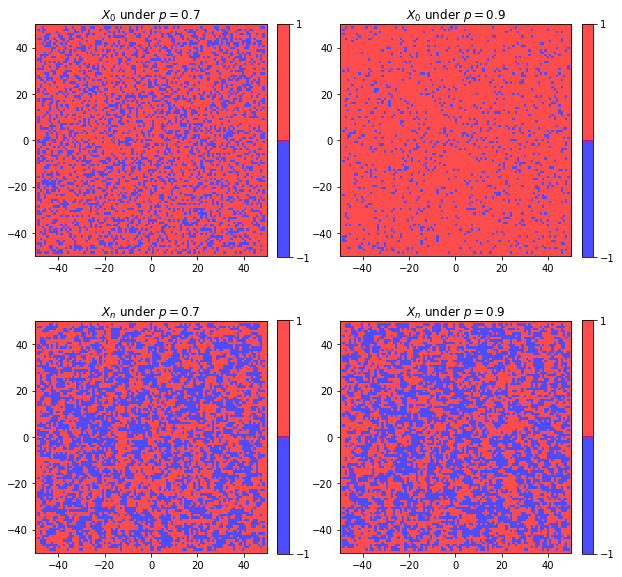

In [4]:
# Parameters
N = 50
beta = 0.1
p_array = [0.7, 0.9] 
nf = 1000000

# MCMC
X_array = []
for p in p_array:
    X_array.append(Ising(N, beta, nf, p))

# Plots
plt.figure(figsize=(10,10))
cmap = plt.get_cmap('bwr', 2)
for i in range(len(p_array)):
    X0 = (2 * np.random.binomial(n=1, p=p_array[i], size=(2*N-1) ** 2) - 1).reshape((2*N-1, 2*N-1))
    X0 = np.pad(X0.reshape((2*(N-1) + 1, 2*(N-1) + 1)), pad_width=1, mode='constant', constant_values=1)
    plt.subplot(2, len(p_array), i+1)
    plt.imshow(X0, cmap=cmap, alpha=0.7, extent=[-N,N,-N,N])
    plt.title(r'$X_0$ under $p={}$'.format(p_array[i]))
    plt.colorbar(ticks=[-1,1], fraction=0.046, pad=0.04)
for i in range(len(p_array)):
    plt.subplot(2, len(p_array), len(p_array)+i+1)
    plt.imshow(X_array[i], cmap=cmap, alpha=0.7, extent=[-N,N,-N,N])
    plt.title(r'$X_n$ under $p={}$'.format(p_array[i]))
    plt.colorbar(ticks=[-1,1], fraction=0.046, pad=0.04)
plt.show()

*  A mayor valor de $p$, $X_0$ contiene mas moléculas con spin $+1$.
*  Independiente de la distribución inicial (valores de $p$), $X_n$ alcanza una distribución de spines similar, obervándose una difusión parcelada de spines $+1$ y $-1$ de aproximadamente la misma cantidad, lo que se condice con que $X_n\approx \pi$ la distribución de equilibrio de la cadena $X$ que modela el ferromagnetismo en una placa metálica plana idealizada.

### Parte 4

Primero, vamos a experimentar los tiempos que demora en computar la distribucion para decidir que valor de $N$ considerar

In [56]:
# Parameters
N_array = [50,100,150,200]
beta = 0.1
p = 0.9
nf = 1000000

# MCMC
X_array = []
for n in N_array:
    X_array.append(Ising(n, beta, nf, p))

Podemos notar que para $N=50$ es suficiente, pues para valores superiores al codigo le toma mucho tiempo en correr, e incluso, esta la posibilidad de que para quien corrija, le aparezca un mensaje de $\texttt{Memory Error}$

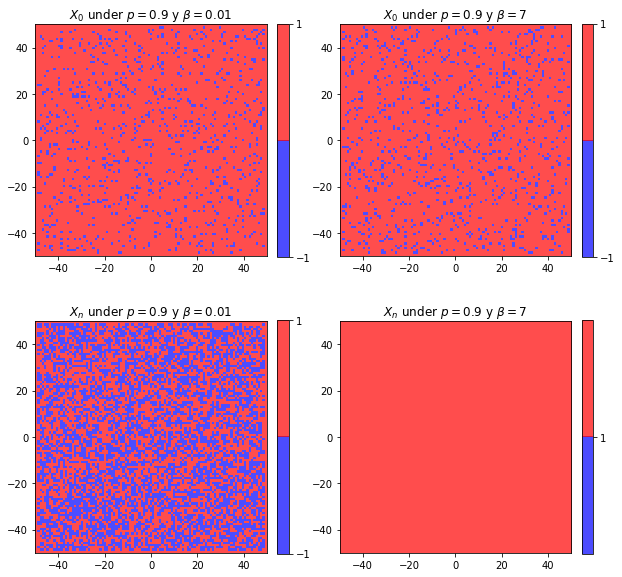

In [10]:
# Parameters
N = 50
beta_array = [0.01, 7]
p = 0.9
nf = 1000000

# MCMC
X_array = []
for beta in beta_array:
    X_array.append(Ising(N, beta, nf, p))
    
# Plots
plt.figure(figsize=(10,10))
cmap = plt.get_cmap('bwr', 2)
for i in range(len(beta_array)):
    X0 = (2 * np.random.binomial(n=1, p=p, size=(2*N-1) ** 2) - 1).reshape((2*N-1, 2*N-1))
    X0 = np.pad(X0.reshape((2*(N-1) + 1, 2*(N-1) + 1)), pad_width=1, mode='constant', constant_values=1)
    plt.subplot(2, len(beta_array), i+1)
    plt.imshow(X0, cmap=cmap, alpha=0.7, extent=[-N,N,-N,N])
    plt.title(r'$X_0$ under $p={}$'.format(p)+' y $\\beta={}$'.format(beta_array[i]))
    plt.colorbar(ticks=[-1,1], fraction=0.046, pad=0.04)
for i in range(len(beta_array)):
    plt.subplot(2, len(beta_array), len(beta_array)+i+1)
    plt.imshow(X_array[i], cmap=cmap, alpha=0.7, extent=[-N,N,-N,N])
    plt.title(r'$X_n$ under $p={}$'.format(p)+' y $\\beta={}$'.format(beta_array[i]))
    plt.colorbar(ticks=[-1,1], fraction=0.046, pad=0.04)
plt.show()

Aqui vemos como para $\beta>5$, $\pi$ deja casi todos los spines hacia arriba, mientras que para $\beta<0.1$, coexisten ambos spines, es decir, hacia arriba y hacia abajo.
Bajo ciertas hipotesis de continuidad, podemos decir que existe un $\beta_{critico}$ (por TVI) que hace que $\pi$ asocie con probabilidad casi 1 todos los spines hacia arriba.

### Parte 5

Para encontrar tal $\beta_{critico}$, vamos a considerar el intervalo $[0,1]$ y veremos como se comporta el promedio de los valores de spin y de esta forma, ver cuando ocurre el salto a $s_{\text{medio}} = 1$

In [40]:
# Parameters
N = 50
beta_array = np.linspace(0,1,11)
p = 0.9
nf = 1000000

# MCMC
X_array = []
for beta in beta_array:
    X_array.append(Ising(N, beta, nf, p))

# Spin mean
meann = []
for i in range(len(beta_array)):
    meann.append(np.mean(X_array[i]))

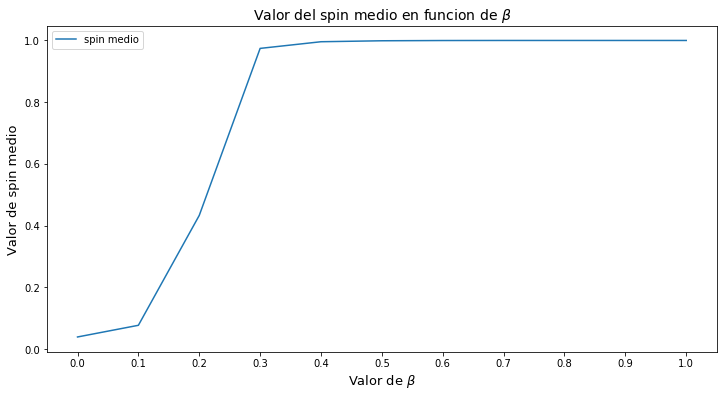

In [41]:
plt.figure(figsize=(12,6))
plt.plot(beta_array, meann, label='spin medio')
plt.xticks(np.arange(min(beta_array), max(beta_array)+0.1, 0.1))
plt.title('Valor del spin medio en funcion de $\\beta$',fontsize=14)
plt.xlabel('Valor de $\\beta$', fontsize=13)
plt.ylabel('Valor de spin medio',fontsize=13)
plt.legend()
plt.show()

### Parte 6

Podemos intuir que $\beta_{critico} \in (0.3; 0.5)$, por lo que acotaremos el intervalo de busqueda

En esta ocasion, consideraremos $\texttt{nf}=5\cdot 10^6$

In [44]:
# Parameters
N = 50
beta_array = np.linspace(0.3,0.5,3)
p = 0.9
nf = 5000000

# MCMC
X_array = []
for beta in beta_array:
    X_array.append(Ising(N, beta, nf, p))

# Spin mean
meann = []
for i in range(len(beta_array)):
    meann.append(np.mean(X_array[i]))

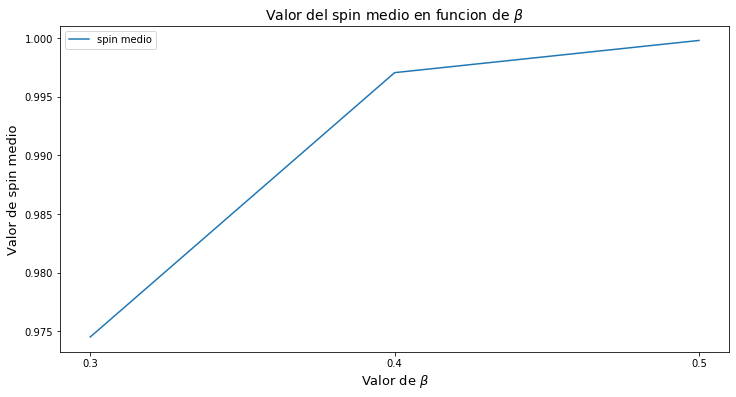

In [45]:
plt.figure(figsize=(12,6))
plt.plot(beta_array, meann, label='spin medio')
plt.xticks(np.arange(min(beta_array), max(beta_array)+0.1, 0.1))
plt.title('Valor del spin medio en funcion de $\\beta$',fontsize=14)
plt.xlabel('Valor de $\\beta$', fontsize=13)
plt.ylabel('Valor de spin medio',fontsize=13)
plt.legend()
plt.show()

Habiendo acotado el intervalo, podemos observar que nuestro $\beta_{critico}$ se encuentre entre $0.4$ y $0.5$

Por otro lado, el valor real de $\beta_{C} \sim 0.44$, por lo que nuestra estimacion es cercana.

Vamos a graficar el modelo $\texttt{Ising}$ para los valores de $\beta = [0.4, 0.44, 0.5]$

In [92]:
# Parameters
N = 50
beta_array = [0.4, 0.44, 0.5]
p = 0.9
nf = 5000000

# MCMC
X_array = []
for beta in beta_array:
    X_array.append(Ising(N, beta, nf, p))

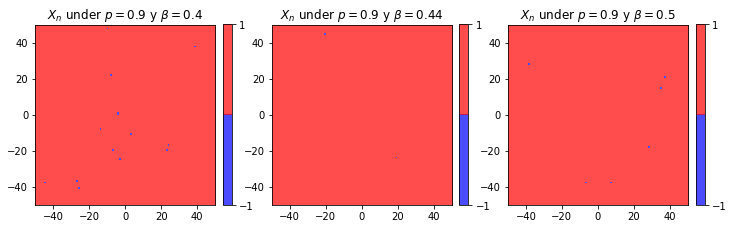

In [93]:
# Plots
plt.figure(figsize=(12,12))
cmap = plt.get_cmap('bwr', 2)
for i in range(len(beta_array)):
    plt.subplot(2, len(beta_array), len(beta_array)+i+1)
    plt.imshow(X_array[i], cmap=cmap, alpha=0.7, extent=[-N,N,-N,N])
    plt.title(r'$X_n$ under $p={}$'.format(p)+' y $\\beta={}$'.format(beta_array[i]))
    plt.colorbar(ticks=[-1,1], fraction=0.046, pad=0.04)
plt.show()

Podemos observar que con $\beta=0.44$, $\pi$ asigna casi seguramente el estado de spin hacia arriba y con $\beta=0.5$ ya casi no hay spin hacia abajo.

## Problema 2: Problema del vendedor viajero


Considere un conjunto $\{1,2,\dots,N\}$ de ciudades en el dominio plano $[0,1]^2$. El problema del vendedor viajero consiste en encontrar un ciclo que recorra todas las ciudades una y solo una vez, partiendo y terminando en la primera, que minimice la distancia recorrida.

Sea $E\{ \sigma \in S_{N} : \sigma (1) = 1 \}$ el conjunto de todas las posibles rutas que empiezan en 1. Es fácil verificar que $|E|=(N-1)!$, por lo que si consideramos el problema con 15 ciudades, la cantidad de rutas posibles es 87.178.291.200, por lo cual el claro que es prácticamente imposible recorrer todas las posibilidades. La idea es construir un algoritmo estocástico, denominado *recocido simulado (simutaled annealing)*, para minimizar la función de distancia total recorrida: 

$$ \omega(\sigma) = \sum_{i=1}^N d( \sigma(i) , \sigma(i+1) ) $$

###  Parte 1
Programe una función que genere $N$ ciudades uniformemente distribuidas en $[0,1]^2$, y que genere luego la matriz $D = (D)_{i,j=1}^{N}$ de distancias, donde $D_{ij}$ es la distancia entre la ciudad $i$ y la ciudad $j$.


Se comienza creando la clase ciudad, que consiste en que guarde su número y su ubicación en coordenadas x e y para ser ordenados en la creación de las otras funciones pedidas.

In [94]:
# Paquetes para esta parte
import seaborn as sns
import math as m
import matplotlib as mpl
import random
import time 

from scipy import optimize
from numpy.random import random_sample as uniforme

In [59]:
#PARTE 1, funci´n que genere las ciudades
#primero definiremos la clase ciudad
class ciudad:
    def __init__(city, numero, coordenadax, coordenaday):
        city.n = numero
        city.x = coordenadax
        city.y = coordenaday 
        assert city.n==int or float #como tal es un natural   
        assert city.x==int or float 
        assert city.y==int or float 

In [60]:
#vale, generemos las ciudades en [0,1]^2
def generador(N):
    C=[]
    for i in range(1,N+1):
        C.append(ciudad(i, np.random.rand(), np.random.rand())) #ponemos i+1 porque si no la primera ciudad es 0 xd
        
    return C
        

In [61]:
def distancia(x1,y1,x2,y2):
    x = (x1 - x2)**2
    y = (y1 - y2)**2
    return (x+y)**0.5

In [62]:
#FIJAMOS AQUI LAS CIUDADES Y CANTIDAD DE ELEMENTOS DE LA SUCECION
N = 20
n = 10**4
g=generador(N)

In [63]:
def MatrizD(N):
    #g=generador(N)
    D=np.zeros((N,N)) 
    for i in range(N):
        xi=g[i].x
       # print(xi)
        yi=g[i].y
        for j in range(N):
            xj=g[j].x
            yj=g[j].y
            d=distancia(xi,yi,xj,yj)
            #print('xi=',xi,'xj=',xj)
            D[i,j]+=d
    return D #antes retornaba tb g
            

### Parte 2

Programe una función que dado un camino que recorre las $N$ ciudades en el orden dado por la permutación $\sigma$, grafique dicho camino.

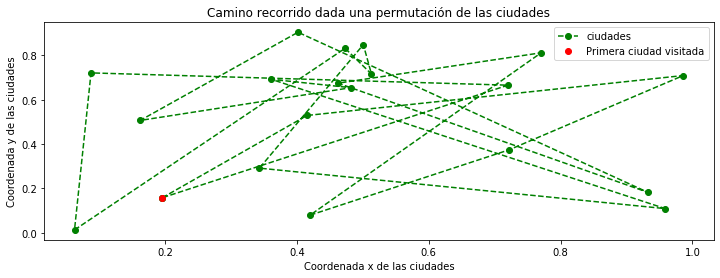

In [64]:
#antes recibia g, veamos ahora
def graf_camino(sigma): #sigma es una lista de numeros de naturales
    N=len(sigma)
    # g=generador(N)
    citys=[] #aqui guardaremos las ciudades, en el orden que se visitan
    X=[]
    Y=[]
    for i in range(N):
        for j in range(N):
            if sigma[i]==g[j].n:
                c=ciudad(sigma[i],g[j].x,g[j].y)
                citys.append(c) 
                X.append(c.x)
                Y.append(c.y)
    X.append(X[0])
    Y.append(Y[0])
    #procedemos a graficar
#    for  i in range(N):
 #       print('Ciudad ',sigma[i],'Coordenadas:', X[i],Y[i]) #esto es para comprobar solamente
    plt.figure(figsize=(12,4))
    plt.plot(X,Y,'--og', label='ciudades')
    plt.plot(X[0],Y[0],'or', label='Primera ciudad visitada') #para mostrar el punto inicial
    plt.xlabel("Coordenada x de las ciudades")
    plt.ylabel("Coordenada y de las ciudades")
    #plt.xticks([0,1])
    #plt.yticks([0,1])
    plt.title("Camino recorrido dada una permutación de las ciudades")
    plt.legend()
    plt.show()
    
 #ejemplo
r=graf_camino([1,4,2,3,6,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

### Parte 3
Se define $osc_{K}(\omega) = max\{ \omega(\tau) - \omega(\sigma) : \sigma ~ \tau \}$. Dé una cota superior para $osc_{K}(\omega)$ para cada $N$, que no dependa de la posición de las ciudades.

Tenemos $\sigma$ y digamos que se intercambian $\sigma(i) = \text{ciudad}\ n$ y $\sigma(j) = \text{ciudad}\ m$, con $1 < i < j < N+1$ para obtener $\tau$, es decir, $\tau(i) = m$ y $\tau(j) = n$. Con eso, veamos que en $w(\sigma)$ son 4 distancias las que contienen las ciudades $n$ y $m$.

\begin{align*}
w(\sigma) =& ... + d(\sigma(i-1),\sigma(i) = n) + d(n, \sigma(i+1)) \\
          & + ... + d(\sigma(j-1),\sigma(j) = m) + d(m, \sigma(j+1)) + ...
\end{align*}

Por lo que $w(\tau)$ será casi igual excepto por estas 4 distancias.

\begin{align*}
w(\tau) = & ... + d(\tau(i-1),\tau(i) = m) + d(m, \tau(i+1)) \\
          & + ... + d(\tau(j-1),\sigma(j) = n) + d(n, \tau(j+1)) + ...
\end{align*}

Donde además, $\tau(i-1) = \sigma(i-1)$ y $\tau(i+1) = \sigma(i+1)$, y lo mismo pero con $j$. Finalmente tenemos:

\begin{align*}
         w(\tau)-w(\sigma)= &\ d(\sigma(i-1),m) + d(m, \sigma(i+1)) + d(\sigma(j-1),n) + d(n, \sigma(j+1)) \\
        & - d(\sigma(i-1),n) - d(n, \sigma(i+1)) - d(\sigma(j-1),m) - d(m, \sigma(j+1))
\end{align*}

Usando $d(a,b) \leq d(a,c) + d(c,b)$ convenientemente, llegamos a lo siguiente:

\begin{align*}
         w(\tau)-w(\sigma) \leq &\ d(\sigma(i-1),n) + d(n,m) + d(m,n) + d(n, \sigma(i+1)) \\
        & + d(\sigma(j-1),m) + d(m,n) + d(n,m) + d(m, \sigma(j+1)) \\
        & - d(\sigma(i-1),n) - d(n, \sigma(i+1)) - d(\sigma(j-1),m) - d(m, \sigma(j+1)) \\
        =&\ 4d(n,m)
\end{align*}

Y tomando máximo a ambos lados:

$$osc_K(w) \leq 4\max d(n,m)$$

es decir, la cota es 4 veces la distancia entre las ciudades más lejanas entre si. Además, dado que se está trabajando en $[0,1]x[0,1]$, la distancia máxima que se puede tener corresponde a la medida de la diagonal del cuadrado, es decir, $\sqrt{2}$, por lo que $osc_K(w) \leq 4\sqrt{2}$.

### Parte 4

Considere una sucesión de temperaturas inversas $\beta_{n} = \frac{1}{C}ln(n + e)$ con $C > (N-1)osc_{K}(\omega)$ y una cadena de Markov $(X_n)$ no homogénea tal que, en el tiempo $n$, su matriz de transición está dada por la matriz de la cadena $(X_{k}^{\beta_{n}})$, según el método visto en cátedra. Es decir: dado $X_{n} = \sigma$, se escoge un vecino $\tau ~ \sigma$ uniformemente al azar, y con probabilidad $min\{e^{-\beta_{n}(\omega(\tau)-\omega(\sigma))}, 1\}$ se define $X_{n+1} = \tau$, si no, se mantiene $X_{n+1} = \sigma$. Se puede probar que dicha cadena converge en probabilidad a una variable aleatoria distribuida uniformemente en el conjunto de mínimos globales de la función $\omega$. Implemente un método que simule esta cadena para un estado inicial que usted escoja.


**R:** Para simular la cadena estipulada, se crean las siguientes funciones, y se ha considerado como estado inicial el recorrido $[1,\dots,N+1]$, con la consideración de que N+1 corresponde a volver al punto inicial.

In [65]:
M = MatrizD(N)

def sumaD(sigma): #esta sería la funcion omega del enunciado
    N=len(sigma)
    citys=[] #aqui guardaremos las ciudades, en el orden que se visitan
    X=[]
    Y=[]
    for i in range(N):
        for j in range(N):
            if sigma[i]==g[j].n:
                c=ciudad(sigma[i],g[j].x,g[j].y)
                citys.append(c) 
                X.append(c.x)
                Y.append(c.y)
    s=0
    for i in range(N):
        s += distancia(X[i],Y[i],X[i-1],Y[i-1])
    return s    

In [66]:
def find_max(N):
    sigma = []
    dist = []
    for i in range(N):
        sigma.append(i+1) #esto nos hace un camino por defecto [1,...,N]
    for i in range(N):
        for j in range(N):
            dist.append(M[i,j])
    return max(dist)
    

In [67]:
import math as m
def betas(N,n): #N ciudades, n indices
    lista = []
    cota = 4 * find_max(N)
    C = cota * (N-1)
    for nu in range(n):
        beta =  (m.log(nu + m.exp(1)))/C
        lista.append(beta)
    return lista

In [68]:
def vecinoazar(L): #L lista
    N = len(L)
    if N==3:
        (L[2],L[1])=(L[1],L[2])
        return L
    i = random.randint(3,N)
    j = random.randint(3,N)
    if j==i:
        return vecinoazar(L)
    else:
        (L[i-1],L[j-1])=(L[j-1],L[i-1])
    return L
    
#ejm
vecinoazar([1,2,3,4])

[1, 2, 4, 3]

In [69]:
def Prob(sigma, tau, Tinv): #Tinv sería una lista
    if exacto2(sigma,tau)==True:
        T=Tinv*((sumaD(sigma)-sumaD(tau)))
        Te = np.exp(T)
        Te.append(1)
        Temp = Te*(1/(N-1))
        return min(Te)
    else:
        return 0

In [70]:
def acceptance_probability(cost, new_cost, Temp):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost)*Temp)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p

In [71]:
#FIJAMOS AQUI LAS CIUDADES Y CANTIDAD DE ELEMENTOS DE LA SUCECION
N = 20
n = 10**4

In [72]:
def startwalk():# Que entregue un amino del tipo 1,....,N
    L=[]
    for i in range(1,N+1):
        L.append(i) # el camino 1,...,N
    return L 

#ejemplo
startwalk()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [73]:
def Recocido(Temp): #N ciudades, n cant de caminos :V
    t0 = time.time()
    estado = startwalk() #estado inicial, la idea es que X sea una lista de listas
    U = []
    for k in range(0,n):
        U.append(uniforme(1))
    costo = sumaD(estado)
    estados, costos = [estado], [costo]
    for i in range(1,n):
        nuevo_estado = vecinoazar(estado)
        nuevo_costo = sumaD(nuevo_estado)
        if U[i] <= acceptance_probability(costo, nuevo_costo, Temp[i]):
            estado = nuevo_estado[:]
            costo = nuevo_costo
    #        print('ifc',costo)
            estados.append(estado)
            costos.append(costo)
        else:         
          estados.append(estado)
          costos.append(costo)
    print('la distancia total recorrida minima es', min(costos))
    print('tiempo de ejecución:', time.time()-t0,'(s)')
    print('Ruta final encontrada', estado)

    return [estado, sumaD(estado), estados, costos, time.time()-t0]

### Parte 5

Para $N = 20$ ciudades fijas, encuentre un mínimo global aproximado de la función $\omega$. Pruebe con sucesiones $\beta_n$ de distintas formas, por ejemplo lineal, cuadrática, exponencial, etc. Grafique en cada caso la evolución de la función $\omega$ evaluada en el estado de la cadena, durante el tiempo de ejecución del algoritmo (el que usted deberá determinar dependiendo de la sucesión $\beta_n$ escogida). Grafique para algunos tiempos representativos los caminos respectivos.

Además de la sucesión de los $\beta_n$, se utilizarán las siguientes suceciones:

1. lineal: $l_{n}=n\cdot\epsilon$
2. cuadrática: $c_{n} = (n\cdot\epsilon)^2$
3. exponencial: $e_{n} = exp(n\epsilon)$

In [75]:
def evolucion(costos):
    l = len(costos)
    E = [] #tiempo discretizado
    for i in range(1,l+1):
        E.append(i)
    plt.figure(figsize=(12,4))
    plt.plot(E,costos,'ob')
    plt.plot(E,costos,'--y')
    plt.title('Evolución de la función $\omega$')
    plt.xlabel('Tiempo discretizado')
    plt.ylabel('Función $\omega$')
    
    plt.show()  

Se grafica la evolución de la función $\omega$, el camino inicial que se le pasa al algoritmo, el que se tiene en la iteración 5000 y el último. Además se procede de forma análoga para las otras temperaturas propuestas:

la distancia total recorrida minima es 7.298893401740091
tiempo de ejecución: 0.711402416229248 (s)
Ruta final encontrada [1, 2, 14, 16, 3, 18, 11, 6, 7, 20, 8, 12, 15, 9, 17, 5, 10, 19, 4, 13]


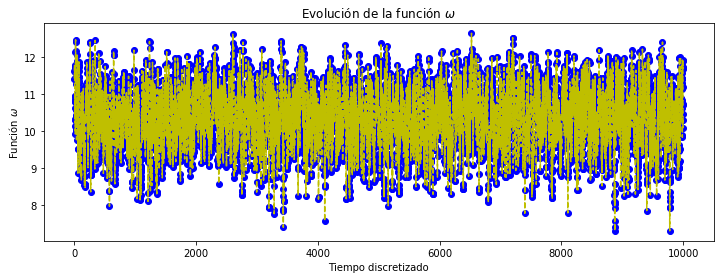

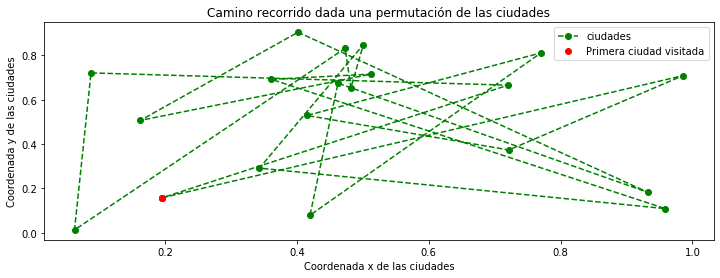

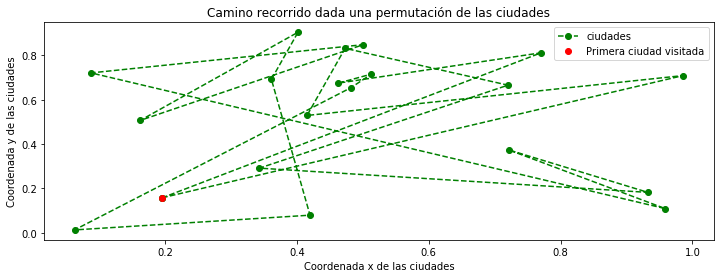

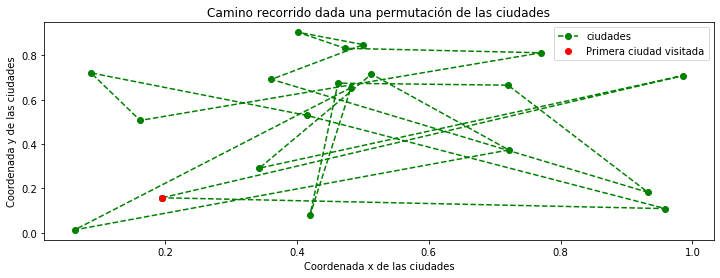

In [77]:
Rb = Recocido(betas(N,n))
evolucion(Rb[3])

graf_camino(Rb[2][0])
graf_camino(Rb[2][5001]) #5001 en vez de 5000 dado que la listas parten desde el indice 0
graf_camino(Rb[2][n-1])

In [78]:
epsilon = 0.001
# temperatura  lineal
def lineal(N,n):
    L = []
    cota = 4 * find_max(N)
    C = cota * (N-1)
    for i in range(n):
        L.append((i+1)*(1/C))
    return L

la distancia total recorrida minima es 7.456578018364838
tiempo de ejecución: 0.7032785415649414 (s)
Ruta final encontrada [1, 2, 15, 6, 14, 9, 10, 19, 4, 3, 8, 12, 16, 5, 13, 18, 7, 17, 20, 11]


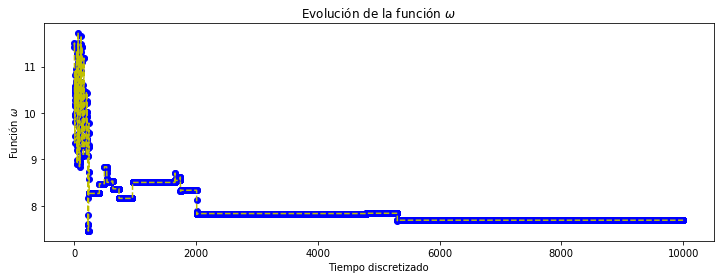

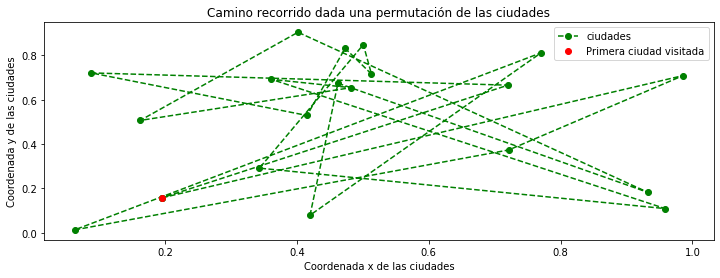

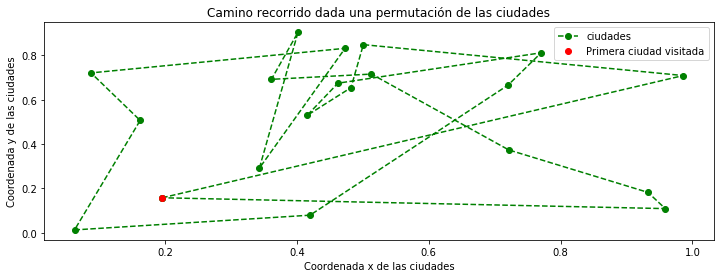

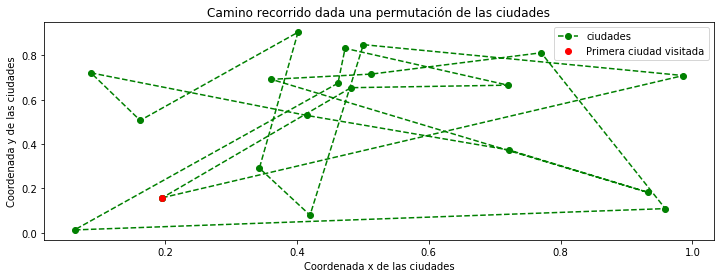

In [79]:
Rl = Recocido(lineal(N,n))
evolucion(Rl[3])

graf_camino(Rl[2][0])
graf_camino(Rl[2][5000])
graf_camino(Rl[2][n-1])

In [80]:
# temperatura cuadratica
def cuadratica(N,n):
    L = []
    cota = 4 * find_max(N)
    C = cota * (N-1)
    for i in range(n):
        L.append((((i+1)**2*(1/C))))
    return L   

la distancia total recorrida minima es 7.396677742640983
tiempo de ejecución: 0.712637186050415 (s)
Ruta final encontrada [1, 2, 18, 17, 4, 13, 9, 19, 6, 3, 8, 14, 5, 20, 7, 16, 12, 10, 15, 11]


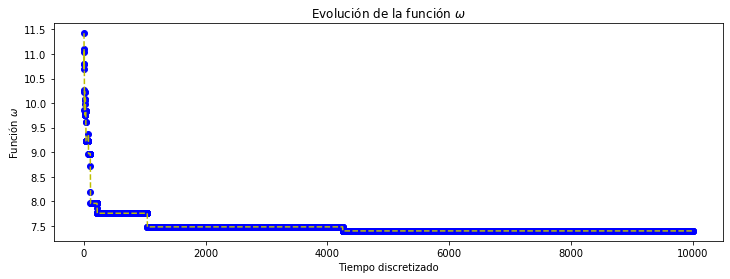

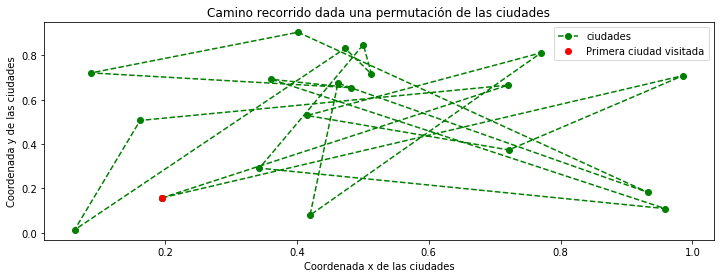

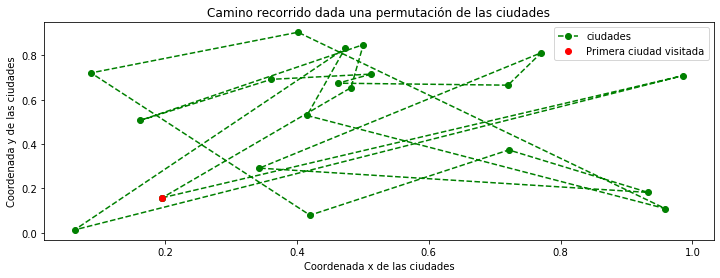

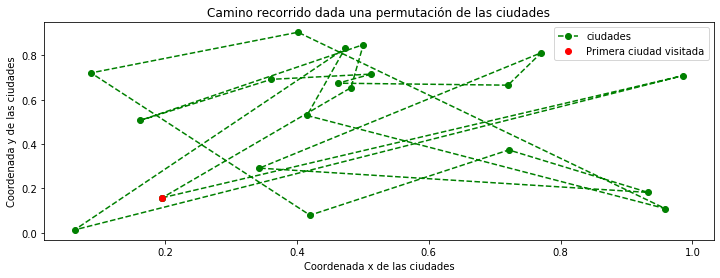

In [81]:
Rc = Recocido(cuadratica(N,n))
evolucion(Rc[3])

graf_camino(Rc[2][0])
graf_camino(Rc[2][5000])
graf_camino(Rc[2][n-1])

In [82]:
#temperatura exponencial
def exponencial(N,n):
    L = []
    cota = 4 * find_max(N)
    C = cota * (N-1)
    for i in range(1,n+1):
        L.append(np.exp(i))
      # L.append((1+1/N**2)**(i+1))
    return L

C:\Users\miuze\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


la distancia total recorrida minima es 7.529509773756331
tiempo de ejecución: 0.7000713348388672 (s)
Ruta final encontrada [1, 2, 10, 12, 8, 13, 18, 17, 7, 11, 5, 6, 20, 16, 15, 9, 14, 3, 4, 19]


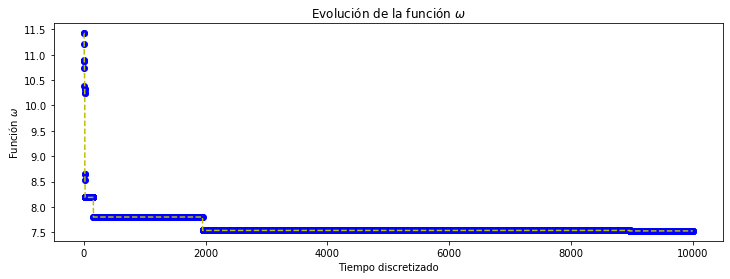

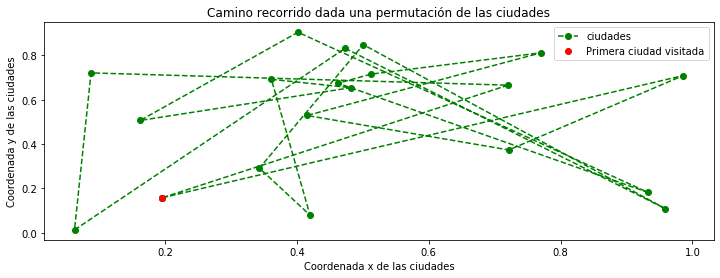

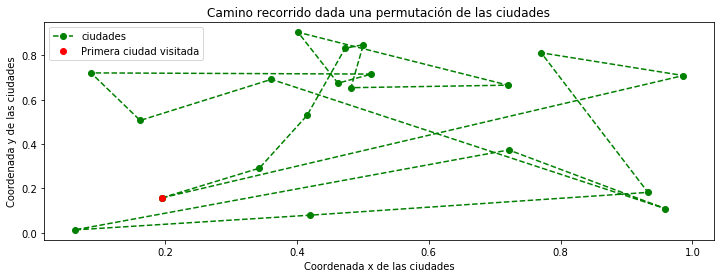

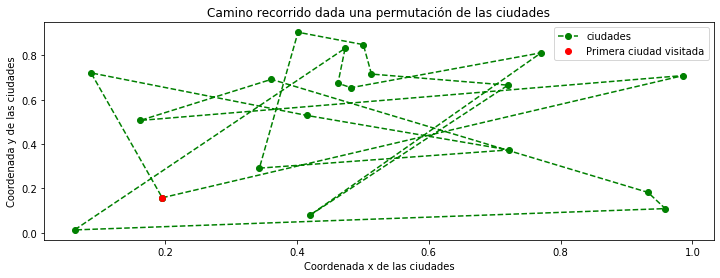

In [83]:
Re = Recocido(exponencial(N,n))
evolucion(Re[3])

graf_camino(Re[2][0])
graf_camino(Re[2][5000])
graf_camino(Re[2][n-1])

Para poder comparar con facilidad, procedemos a graficar la evolución de $omega$ con todas las temperaturas que se han mostrado:

A modo resumen, para comparar, se tiene que:
    

In [85]:
import pandas as pd
temp=['betas','lineal','cuadrática','exponencial']
W = [Rb[1],Rl[1],Rc[1],Re[1]]
df = pd.DataFrame(data = [[temp[i], W[i]] for i in range(4)], columns = ['Sucesión', 'distancia total mínima'])
df

,Sucesión,distancia total mínima
0,betas,10.298145
1,lineal,9.649063
2,cuadrática,10.224363
3,exponencial,9.493046


Además del recorrido, en forma de lista, optimo según cada tipo de sucesión:

In [87]:
temp=['betas','lineal','cuadrática','exponencial']
E = [Rb[0],Rl[0],Rc[0],Re[0]]
for i in range(4):
    print('Ruta recorrida según',temp[i], ":", E[i])
df = pd.DataFrame(data = [[temp[i], E[i]] for i in range(4)], columns = ['Sucesión', 'Ruta recorrida óptima'])
df

Ruta recorrida según betas : [1, 2, 14, 16, 3, 18, 11, 6, 7, 20, 8, 12, 15, 9, 17, 5, 10, 19, 4, 13]
Ruta recorrida según lineal : [1, 2, 15, 6, 14, 9, 10, 19, 4, 3, 8, 12, 16, 5, 13, 18, 7, 17, 20, 11]
Ruta recorrida según cuadrática : [1, 2, 18, 17, 4, 13, 9, 19, 6, 3, 8, 14, 5, 20, 7, 16, 12, 10, 15, 11]
Ruta recorrida según exponencial : [1, 2, 10, 12, 8, 13, 18, 17, 7, 11, 5, 6, 20, 16, 15, 9, 14, 3, 4, 19]


,Sucesión,Ruta recorrida óptima
0,betas,"[1, 2, 14, 16, 3, 18, 11, 6, 7, 20, 8, 12, 15,..."
1,lineal,"[1, 2, 15, 6, 14, 9, 10, 19, 4, 3, 8, 12, 16, ..."
2,cuadrática,"[1, 2, 18, 17, 4, 13, 9, 19, 6, 3, 8, 14, 5, 2..."
3,exponencial,"[1, 2, 10, 12, 8, 13, 18, 17, 7, 11, 5, 6, 20,..."


Sin embargo, hay algo rato en estas rutas ideales, dado que uno tendería a pensar que el recorrido ideal tendrá una forma poligonal sin 'cruces' entre la rutas de las ciudades como ocurre en este caso, por lo que se debe considerar una mejora en el algoritmo propuesto, además de que este mejorará si le damos como recorrido inicial el que se obtiene tras correrlo una vez con el recorrido $[1,\dots,N]$.

In [88]:
def evolucion_omega(cb, cl, cc, ce): #costo 
    lb = len(cb)
    ll = len(cl)
    lc = len(cc)
    le = len(ce)
    Eb = [] #tiempo discretizado para beta
    El =[]
    Ec = []
    Ee = []
    for i in range(1,lb+1):
        Eb.append(i)
    for i in range(1,ll+1):
        El.append(i)
    for i in range(1,lc+1):
        Ec.append(i)
    for i in range(1,le+1):
        Ee.append(i)       
    plt.figure(figsize=(12,4))
    plt.plot(Eb,cb,'--c', label='$beta') #temp beta
    plt.plot(El,cl,'--g', label='lineal') #temp lineal
    plt.plot(Ec,cc,'--y', label='cuadratica') #temp cuadratica
    plt.plot(Ee,ce,'--m', label='exponencial') #temp exp
    plt.title('Evolución de la función $\omega$ para distintas temperaturas')
    plt.xlabel('Tiempo discretizado')
    plt.ylabel('Función $\omega$')
    plt.legend()
    plt.show()

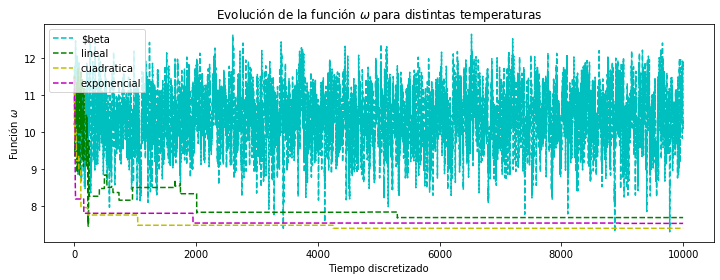

In [89]:
evolucion_omega(Rb[3], Rl[3], Rc[3], Re[3])

De este gráfico, se infiere que si bien se sabe, por lo visto en cátedra, que con la suceción $\beta_{n}$ se convergerá al mínimo de la función $\omega$, este tiene lo hace de una forma bastante lenta, mientras que las otras suceciones de 'temperaturas' lo hacen con mayor rapidez, lo que concuerda con la teoría. Sobre cual sucesión es mejor no se ha llegado a ninguna respuesta en concreto dado que dependiendo del azar de las ciudades (correr una y otra vez todo el codigo presente) varia cual nos entrega el mejor valor factible para el mínimo de $\omega$.